# Sales Prediction for Big Mart Outlets

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

# Data Dictionary:

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

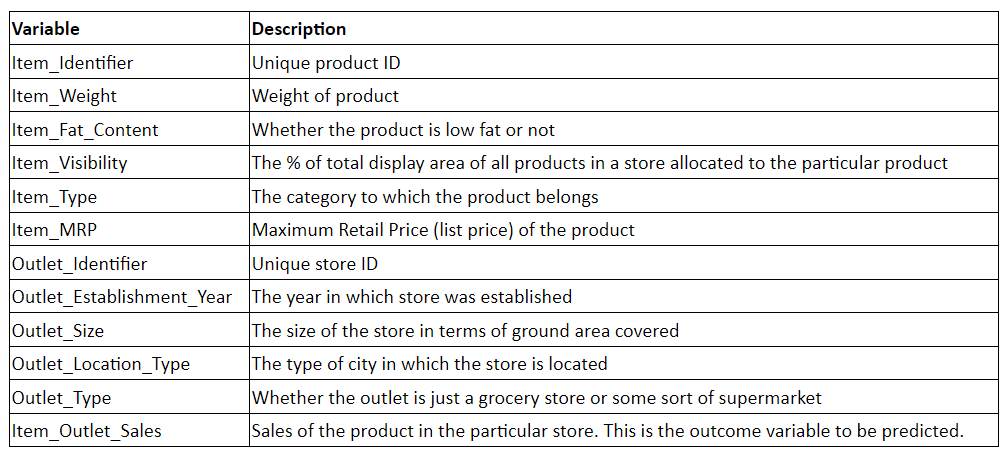

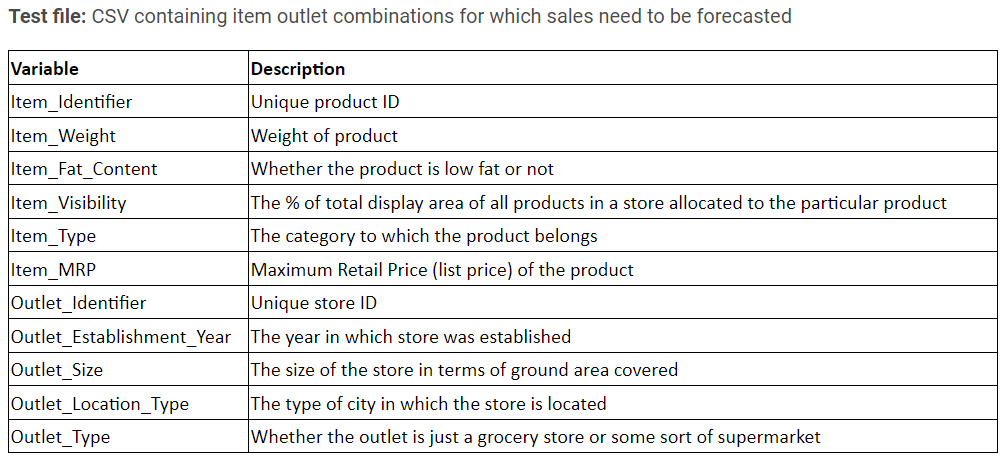

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [15,10]

In [2]:
# Reading the dataset

train = pd.read_csv('train_v9rqX0R.csv')
test = pd.read_csv('test_AbJTz2l.csv')

In [3]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#Checking null values for train

train.isnull().sum()/len(train)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [6]:
#Checking null values for test

test.isnull().sum()/len(train)*100

Item_Identifier               0.000000
Item_Weight                  11.451367
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  18.843130
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

* The columns 'Item_Weight' and 'Outlet_Size' contains null values.

In [7]:
# Submission File

submission = pd.DataFrame({"Item_Identifier" : test.Item_Identifier,
                           "Outlet_Identifier" : test.Outlet_Identifier,
                           "Item_Outlet_Sales" : train.Item_Outlet_Sales.mean()})

In [8]:
submission.to_csv("basemode.csv", index = False) #1773.8

In [9]:
# Concatenate the data

combined = pd.concat([train, test], ignore_index=True)

In [10]:
combined.shape

(14204, 12)

# Numerical Variables:

In [11]:
combined.select_dtypes(include= np.number).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

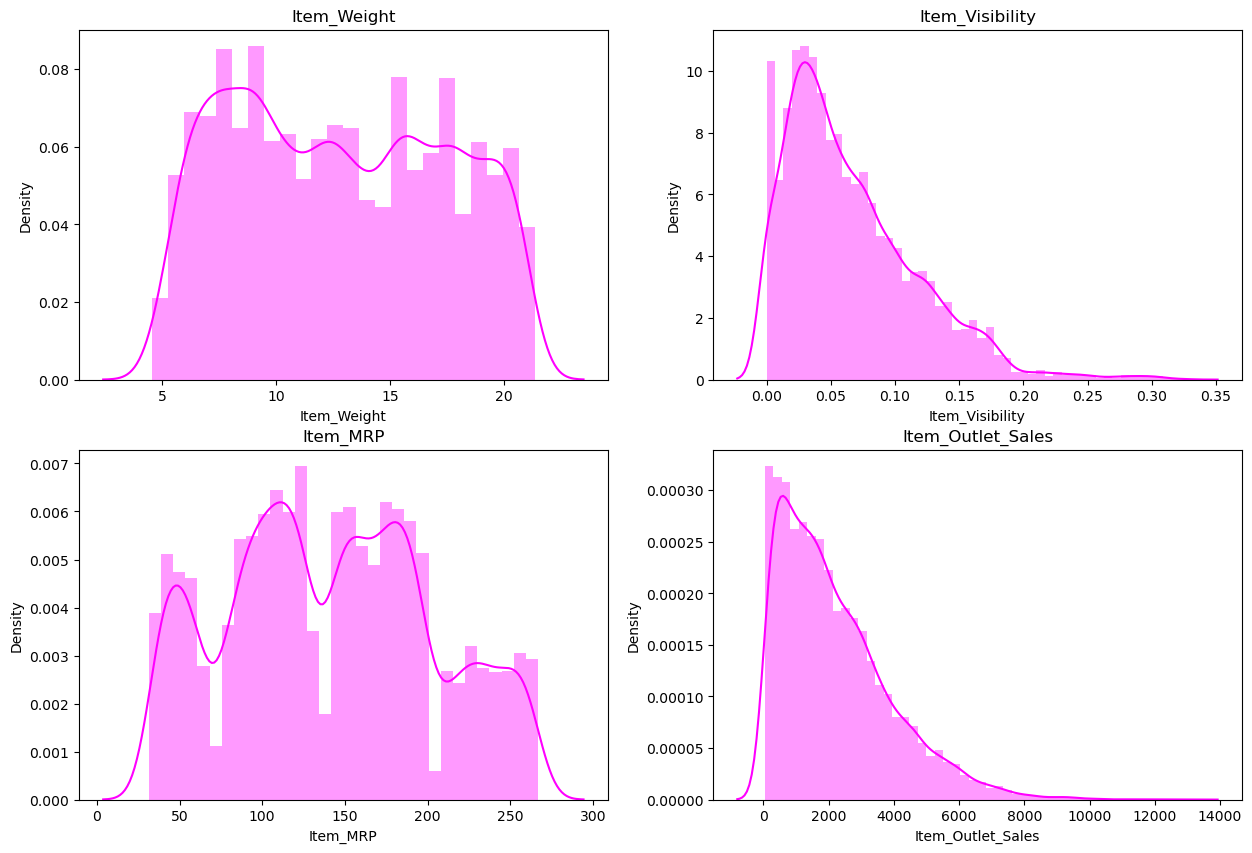

In [12]:
num_cols = ['Item_Weight', 'Item_Visibility',
            'Item_MRP', 'Item_Outlet_Sales']

nrows = 2
ncols = 2
iterator = 1

for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.distplot(combined.loc[:, i], color = "magenta")
    plt.title(i)
    iterator+=1

plt.tight_layout
plt.show()

**Inference:**

* Item Weight has no pattern of skewness. Appears uniform. 
* Item Visibility is positively skewed
* in Item MRP it has 4 modes.
* Sales is skewed.

# Categorical Variables:

In [14]:
# Categorical Variables.

combined.select_dtypes(include= "object").columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [15]:
combined.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

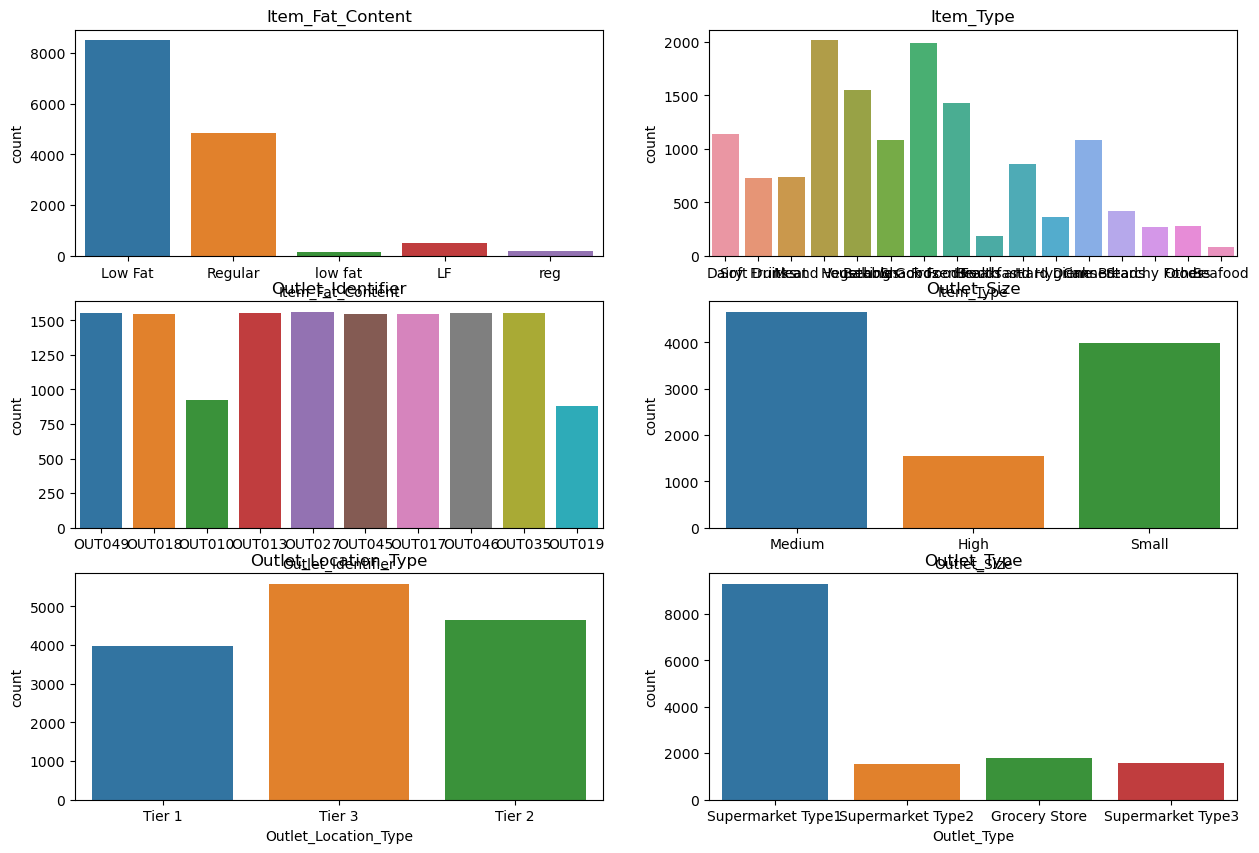

In [16]:
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

nrows = 3
ncols = 2
iterator = 1

for i in cat_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.countplot(combined.loc[:, i])
    plt.title(i)
    iterator+=1

plt.tight_layout
plt.show()

#### Inference of above plot:

- Most of outlets are medium size ooutlets.
- The Item Types are only 2 in the data: Low Fat & Regular.
- Most of the outlets are Tier 3 Outlets.
- And the outlets are mostly S1 types outlets.

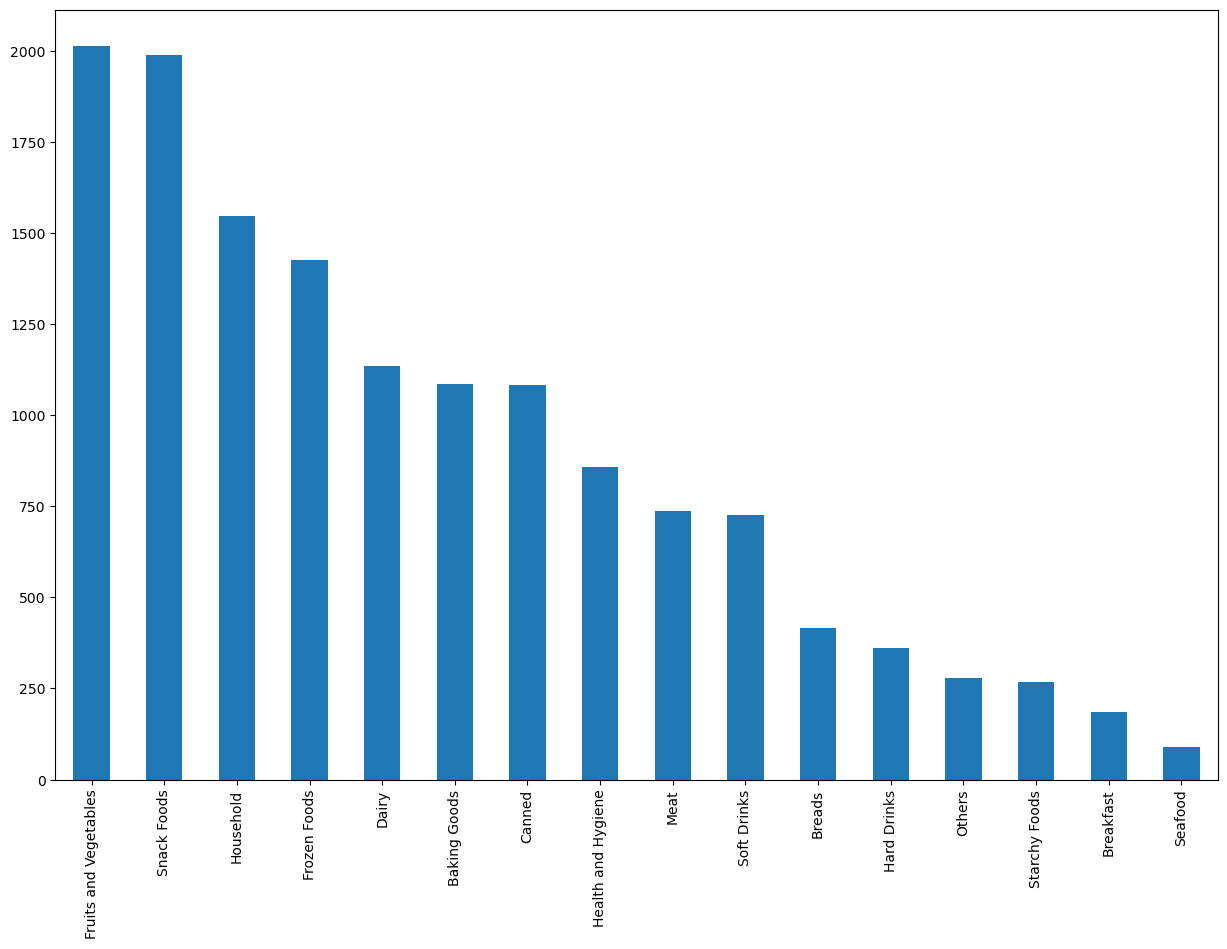

In [17]:
combined.Item_Type.value_counts().plot(kind = "bar")
plt.show()

#### Inference of above Bar plot:

- Top 5 Selling products are Fruits and Vegetables, Snacks Foods, household, Frozen Foods, Dairy.

In [18]:
# outlet

combined.Outlet_Identifier.value_counts()

# Outlet 27 is the highly visible outlet in the business.

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

#### Summary:

- Most Spread out Outlet in the business is "OUT027"
- Most of the Outlets are in Tier 3 Cities.
- The Top selling Item are fruits & Veggies, Dairy, Snacks, Frozen and Household.
- Generally the Outlets are of S1 Type in Nature

In [19]:
# Fix the Item Fat Content

combined.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [20]:
combined.Item_Fat_Content.replace(to_replace=['Low fat','LF','reg'],
                                 value = ["Low Fat", "Low Fat", "Regular"],
                                 inplace = True)

# Bivariate Analysis:
    
> **Num vs Num** (tgt var)

> **Cat vs Num** (tgt var)

Num vs Num

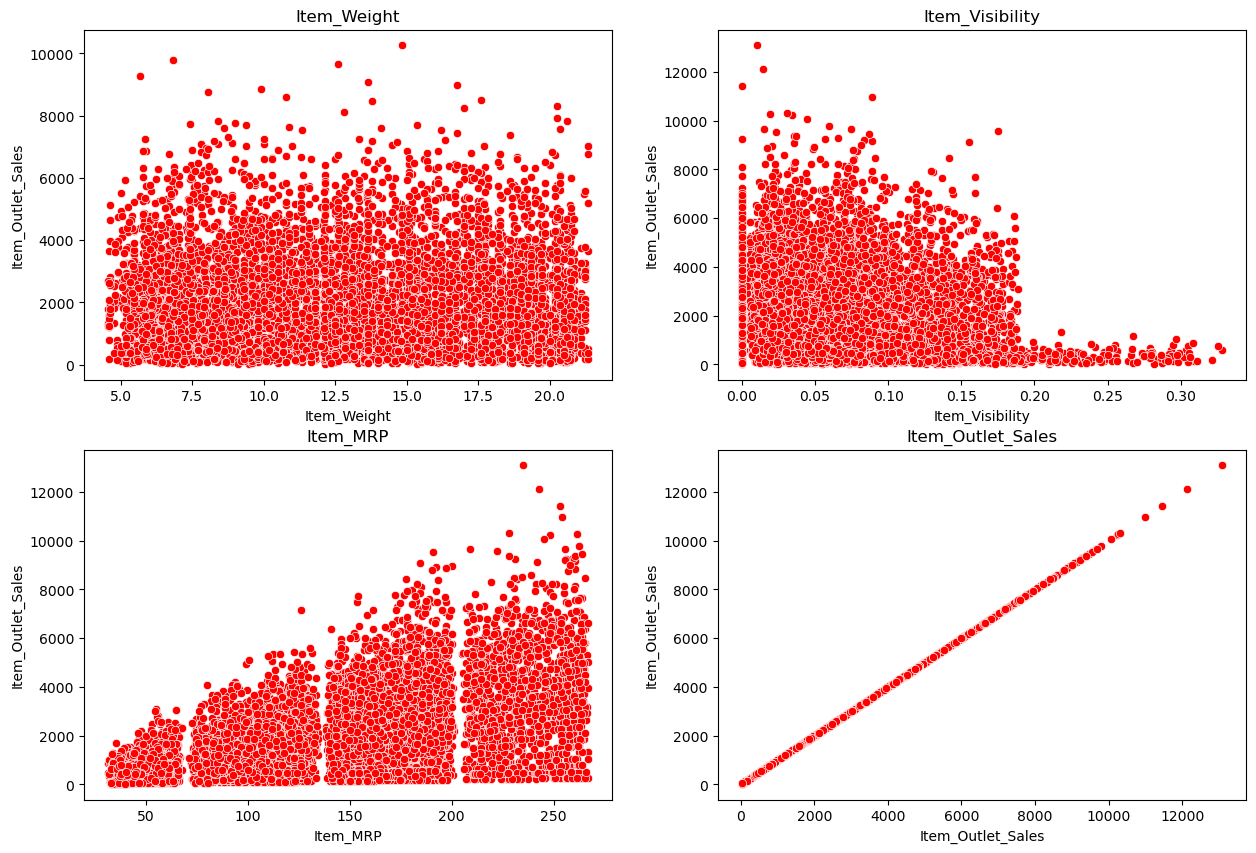

In [21]:
# Scatterplot

nrows = 2
ncols = 2
iterator = 1

for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.scatterplot(combined.loc[:,i], combined.Item_Outlet_Sales,
                   color = 'Red')
    plt.title(i)
    iterator +=1
    
plt.tight_layout
plt.show()

# Inference of above Scatterplot:

- Item Visibility has lot of 0s that needs fixing.
- Item visibility has a -ve effect as the Visibility Increases, the sales go down.
- Item Weight has no relation with sales since it is uniform in nature.
- Item MRP since, it was a multimodel data, 
  we can see that there are 4 Clusters of Sales emerging.
- We also understand that due to combination effect, the clusters are developed.

Cat vs Num

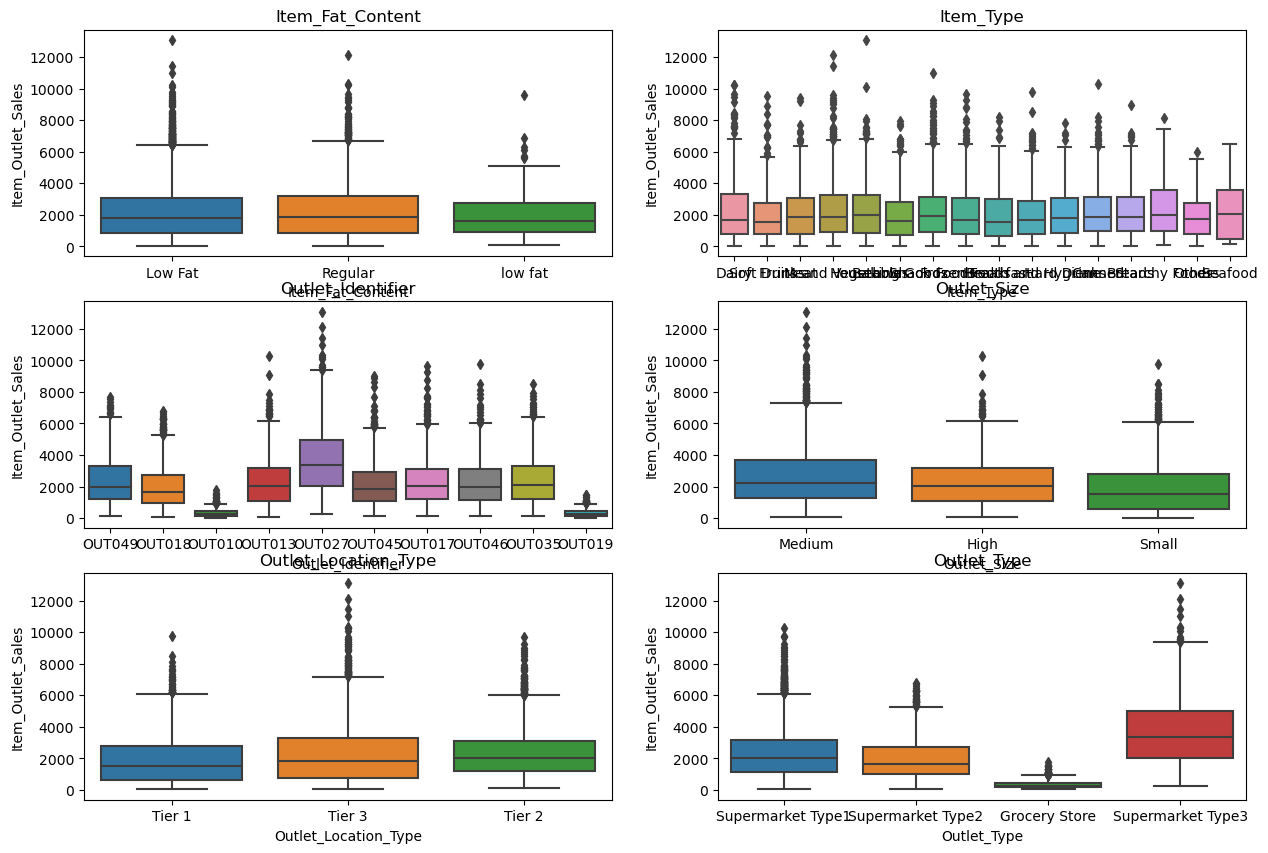

In [22]:
# Scatterplot

nrows = 3
ncols = 2
iterator = 1

for i in cat_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.boxplot(combined.loc[:,i], combined.Item_Outlet_Sales)
    plt.title(i)
    iterator +=1
    
plt.tight_layout
plt.show()

# Inference of above Box-plot:

- Low Fat Content have the Highest Sales.
- Tire 3 Cities followed by S3 have the Highest Sales.
- Most Revenue Generating Outlets are OUT027 & OUT013.
- The worst performing outlets are OUT019 & OUT010 followed by Grocery store...

# Missing Values

In [23]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [24]:
# Item Weight

combined.loc[combined.Item_Weight.isnull()].tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14178,FDX32,NaN,Regular,0.099375,Fruits and Vegetables,143.6786,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14179,FDC39,NaN,Low Fat,0.158425,Dairy,207.8296,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14184,DRG37,NaN,Low Fat,0.000000,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14188,DRE03,NaN,Low Fat,0.024110,Dairy,46.0718,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14192,FDN31,NaN,Low Fat,0.072529,Fruits and Vegetables,188.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


In [25]:
# Note: Never fill null values in numerical columns with mode. (maybe for categorical)

In [26]:
# mapping = combined.groupby("Item_Identifier")["Item_Weight"].mean().to_dict()
# combined["Item_Weight"] = combined.Item_Identifier.map(mapping)

# Handling Null Values:

**Item Weight**

In [27]:
combined["Item_Weight"] = combined.groupby("Item_Identifier")["Item_Weight"].apply(lambda x: x.fillna(x.mean()))

**Item Visibility**

In [28]:
combined["Item_Visibility"] = combined.groupby("Item_Identifier")["Item_Visibility"].apply(lambda x: x.replace(to_replace = 0,value = x.mean()))

In [29]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [30]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [31]:
# Frequency Table
pd.DataFrame(combined.groupby("Outlet_Type")["Outlet_Size"].value_counts()).T

Outlet_Type Grocery Store Supermarket Type1              Supermarket Type2  \
Outlet_Size         Small             Small  High Medium            Medium   
Outlet_Size           880              3100  1553   1550              1546   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  
Outlet_Size              1559

#### Inference:

- Grocery Store ~ Small
- S2 and S3 ~ Medium
- S1 ~ Small

**Outlet**

In [32]:
combined.loc[(combined.Outlet_Type=="Grocery Store") & (combined.Outlet_Size.isnull()), "Outlet_Size"] = "Small"

In [33]:
combined.loc[(combined.Outlet_Type=="Supermarket Type1") & (combined.Outlet_Size.isnull()), "Outlet_Size"] = "Small"

In [34]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

# Feature Engineering

In [35]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [36]:
ids = []

for i in combined.Item_Identifier:
    ids.append(i[:2])

In [37]:
combined["Item_Ids"] = pd.Series(ids)

In [38]:
# sns.boxplot(combined.Item_Ids, combined.Item_Outlet_Sales)
# plt.show()

**Perishable and Non-Perishables**

In [39]:
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [40]:
perishables = ['Dairy', 'Meat', 'Fruits and Vegetables',
               'Breakfast', 'Breads', 'Starchy Foods', 'Seafood']

def perish(x):
    if x in perishables:
        return("Perishables")
    else:
        return("Non-Perishable")

In [41]:
combined["Item_Type_Cat"] = combined.Item_Type.apply(perish)

In [42]:
pd.crosstab(combined.Item_Ids,combined.Item_Fat_Content)

Item_Fat_Content,Low Fat,Regular,low fat
Item_Ids,,,
DR,1177,109,31
FD,5188,4910,103
NC,2642,0,44


In [43]:
#Apply Non Edible inItem fat Content for NC...

combined.loc[combined.Item_Ids=="NC", "Item_Fat_Content"]="Non_Edible"

In [44]:
# Vintage of the Outlets...

combined["Vintage"] = 2013 - combined.Outlet_Establishment_Year

In [45]:
# Price Per Unit = MRP/Weight

combined["Price_Per_Unit"] = combined.Item_MRP/combined.Item_Weight

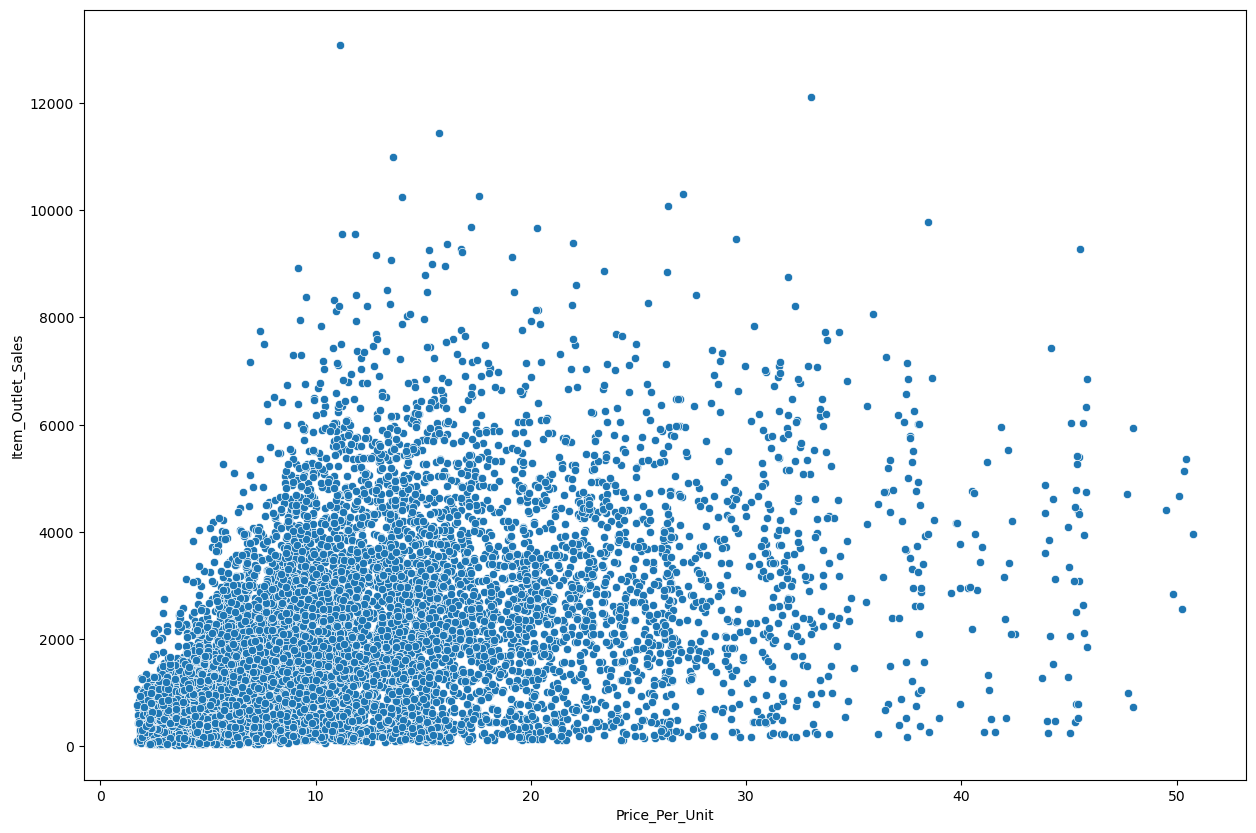

In [46]:
sns.scatterplot(combined.Price_Per_Unit, combined.Item_Outlet_Sales)
plt.show()

In [47]:
# Sales Summary basis Outlets

combined.groupby("Outlet_Identifier")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Identifier,,,,,,,,
OUT010,555.0,339.351662,271.014855,33.2900,154.13270,250.3408,455.40720,1775.6886
OUT013,932.0,2298.995256,1533.531664,73.2380,1072.60380,2050.6640,3166.37835,10256.6490
OUT017,926.0,2340.675263,1550.778025,143.8128,1195.94325,2005.0567,3096.46935,9664.7528
OUT018,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228
OUT019,528.0,340.329723,249.979449,33.9558,153.63335,265.3213,460.73360,1482.0708
OUT027,935.0,3694.038558,2127.760054,241.6854,2044.33890,3364.9532,4975.52340,13086.9648
OUT035,930.0,2438.841866,1538.512533,113.8518,1238.88735,2109.2544,3310.35760,8479.6288
OUT045,929.0,2192.384798,1462.399658,99.8700,1068.60900,1834.9448,2929.52000,8994.9580
OUT046,930.0,2277.844267,1488.405631,101.8674,1137.18640,1945.8005,3095.63710,9779.9362


In [48]:
outlet_sales = combined.groupby("Outlet_Identifier")["Item_Outlet_Sales"].mean().to_dict()

In [49]:
combined["Outlet_Identifier"] = combined.Outlet_Identifier.map(outlet_sales)

In [50]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Ids,Item_Type_Cat,Vintage,Price_Per_Unit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,2348.354635,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,14,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,1995.498739,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non-Perishable,4,8.153581
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,2348.354635,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishables,14,8.092457
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,339.351662,1998,Small,Tier 3,Grocery Store,732.3800,FD,Perishables,15,9.484115
4,NCD19,8.93,Non_Edible,0.009780,Household,53.8614,2298.995256,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non-Perishable,26,6.031512


In [51]:
# Drop the columns

newdata = combined.drop(["Item_Identifier", "Outlet_Establishment_Year", "Item_Type"], axis = 1)

# Statistical Test

In [52]:
import scipy.stats as stats

In [53]:
# Split the Data in Train and Test

newtrain = newdata.loc[0:train.shape[0]-1,:]
newtest = newdata.loc[train.shape[0]:, :]
newtest.drop("Item_Outlet_Sales", axis = 1, inplace = True)
print(newtrain.shape, newtest.shape)

(8523, 13) (5681, 12)


In [54]:
cols = newtrain.select_dtypes(include = np.number).columns

for i in cols:
    teststats, pvalue = stats.ttest_ind(newtrain.loc[:, i],
                                       newtrain.Item_Outlet_Sales)
    print(i, ": ", pvalue)

Item_Weight :  0.0
Item_Visibility :  0.0
Item_MRP :  0.0
Outlet_Identifier :  0.9999999999999825
Item_Outlet_Sales :  1.0
Vintage :  0.0
Price_Per_Unit :  0.0


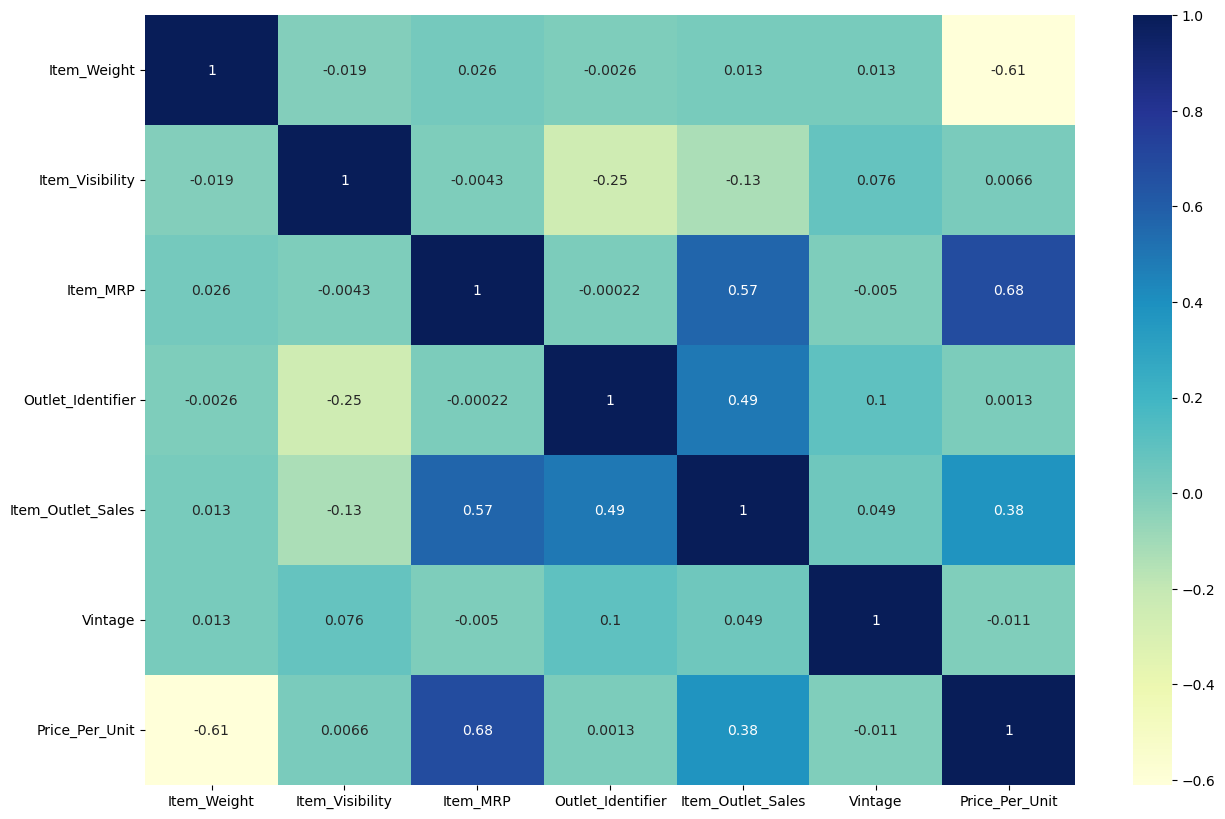

In [55]:
sns.heatmap(newtrain.loc[:, cols].corr(), annot = True, cmap = "YlGnBu")
plt.show()

# Outliers

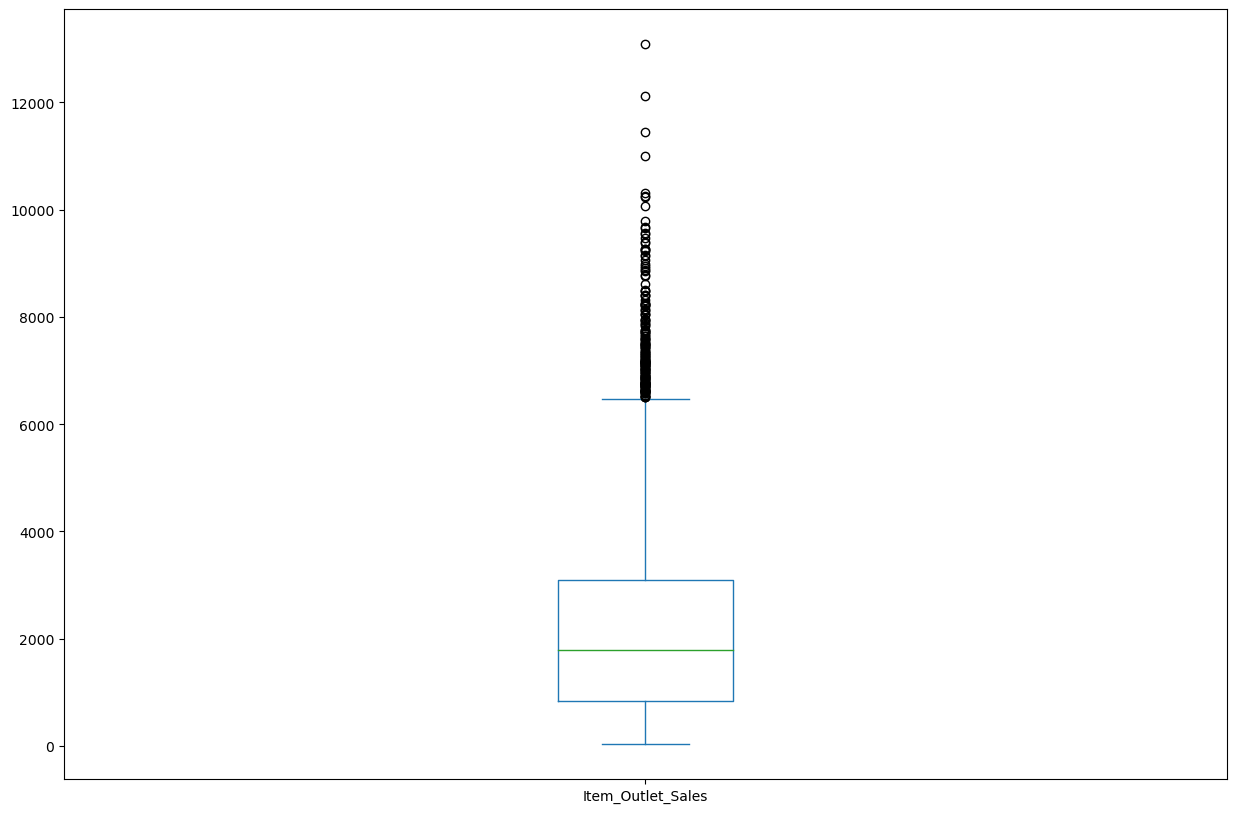

In [56]:
combined.Item_Outlet_Sales.plot(kind = 'box')
plt.show()

In [57]:
# Remove The outliers

q1 = newtrain.quantile(0.25)
q3 = newtrain.quantile(0.75)

iqr = q3-q1

ul = q3+1.5*iqr
ll = q1-1.5*iqr

wt_outliers = newtrain.loc[~((newtrain<ll) | (newtrain>ul)).any(axis = 1)]

In [58]:
wt_outliers.shape

(6169, 13)

# Model Building

> **Encoding**

In [81]:
# Importing the Libraries

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [96]:
lr = LinearRegression()
dtree = DecisionTreeRegressor()
rf = RandomForestRegressor()
xgb = XGBRegressor()

In [60]:
newtrain.Outlet_Size.value_counts()

mapped = {"Small": 3, "Medium": 2, "High": 1}

newtrain["Outlet_Size"] = newtrain.Outlet_Size.map(mapped)
# wt_outliers["Outlet_Size"] = wt_outliers.Outlet_Size.map(mapped)

In [67]:
wt_outliers.shape, newtrain.shape

((6169, 13), (8523, 13))

In [68]:
train_encoded = pd.get_dummies(newtrain, drop_first = True)
#wt_encoded = pd.get_dummies(wt_outliers, drop_first = True)
print(train_encoded.shape, wt_encoded.shape)

(8523, 19) (6169, 18)


In [69]:
# newtest encoding
newtest['Outlet_Size'] = newtest.Outlet_Size.map(mapped)
newtest_encoded = pd.get_dummies(newtest, drop_first = True)

# Linear Regression Model

In [70]:
# Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5, shuffle = True, random_state=0)
lr = LinearRegression()

pred = []
X = train_encoded.drop("Item_Outlet_Sales", axis = 1)
y = train_encoded.Item_Outlet_Sales

for train_index, test_index in kfold.split(X, y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(lr.fit(xtrain, ytrain).predict(newtest_encoded))
    
# Prediction File
finalpred = np.abs(pd.DataFrame(pred).T.mean(axis = 1))

In [71]:
submission = pd.DataFrame({"Item_Identifier": test.Item_Identifier,
                          "Outlet_Identifier":test.Outlet_Identifier,
                          "Item_Outlet_Sales":finalpred})

submission.to_csv("LRModel.csv", index = False)

# Gradient Boosting Regressor Model

In [78]:
pred = []
for train_index, test_index in kfold.split(X,y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(gbm.fit(xtrain, ytrain).predict(newtest_encoded))
    
# prediction file
finalpred = np.abs(pd.DataFrame(pred).T.mean(axis = 1))

#submission File
submission = pd.DataFrame({"Item_Identifier": test.Item_Identifier,
                          "Outlet_Identifier":test.Outlet_Identifier,
                          "Item_Outlet_Sales":finalpred})

submission.to_csv("GBM.csv", index = False)

# Random Forest Regressor Model

In [83]:
pred = []

for train_index, test_index in kfold.split(X,y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(rf.fit(xtrain,ytrain).predict(newtest_encoded))


finalpred = np.abs(pd.DataFrame(pred).T.mean(axis = 1))

# Submission File
submission = pd.DataFrame({"Item_Identifier": test.Item_Identifier,
                          "Outlet_Identifier":test.Outlet_Identifier,
                          "Item_Outlet_Sales":finalpred})

submission.to_csv("RF.csv", index = False)

# XGBRegressor Model

In [84]:
pred = []

for train_index, test_index in kfold.split(X,y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(xgb.fit(xtrain,ytrain).predict(newtest_encoded))


finalpred = np.abs(pd.DataFrame(pred).T.mean(axis = 1))

# Submission File
submission = pd.DataFrame({"Item_Identifier": test.Item_Identifier,
                          "Outlet_Identifier":test.Outlet_Identifier,
                          "Item_Outlet_Sales":finalpred})

submission.to_csv("XGB.csv", index = False)

# LGBMRegressor Model

In [85]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(learning_rate = 0.01)

pred = []

for train_index, test_index in kfold.split(X,y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(lgbm.fit(xtrain,ytrain).predict(newtest_encoded))


finalpred = np.abs(pd.DataFrame(pred).T.mean(axis = 1))

# Submission File
submission = pd.DataFrame({"Item_Identifier": test.Item_Identifier,
                          "Outlet_Identifier":test.Outlet_Identifier,
                          "Item_Outlet_Sales":finalpred})

submission.to_csv("LGBM.csv", index = False)

# Decision Tree Regressor Model

In [91]:
pred = []

for train_index, test_index in kfold.split(X,y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(dtree.fit(xtrain,ytrain).predict(newtest_encoded))


finalpred = np.abs(pd.DataFrame(pred).T.mean(axis = 1))

# Submission File
submission = pd.DataFrame({"Item_Identifier": test.Item_Identifier,
                          "Outlet_Identifier":test.Outlet_Identifier,
                          "Item_Outlet_Sales":finalpred})

submission.to_csv("DTree.csv", index = False)

# Grid Search on Gradient Boosting Model

In [97]:
gbm = GradientBoostingRegressor()

In [2]:
#
# from sklearn.model_selection import GridSearchCV

# params = [{'n_estimator':[100,200,500,1000],
#           'criterion':['friedman_mse','squared_error', 'mse'],
#           'min_samples_split':[2,4,6,8]}]

# grid = GridSearchCV(estimator= gbm, param_grid= params, cv = 3)

# grid.fit(X,y)

# grid.best_params_

**END**